Importing modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv('/content/IRIS.xls')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
# to display stats about the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# to display basic info about the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# to display no. of samples on each class
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
# check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Exploratory Data Analysis

<Axes: >

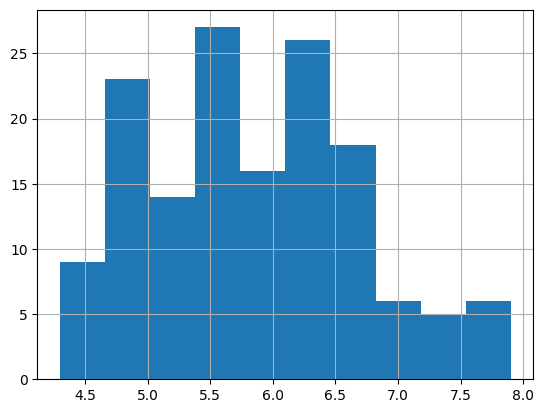

In [9]:

df['sepal_length'].hist()

<Axes: >

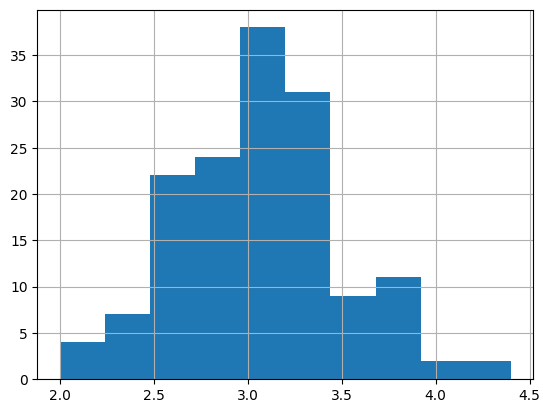

In [10]:
df['sepal_width'].hist()

<Axes: >

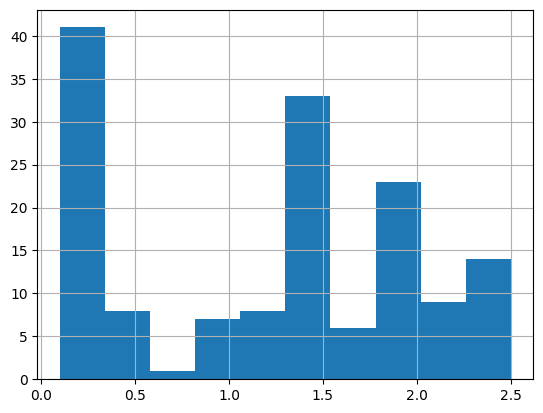

In [11]:
df['petal_width'].hist()

<Axes: >

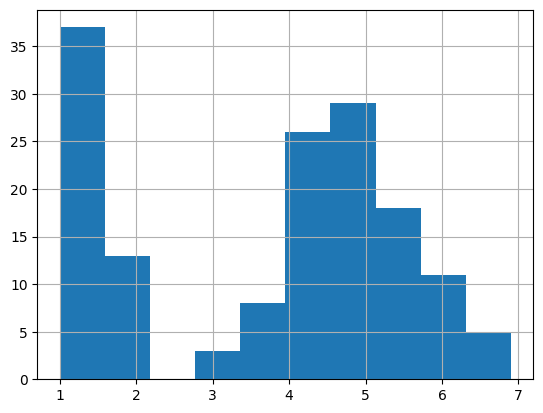

In [12]:
df['petal_length'].hist()

In [13]:
# scatter plot
colors = ['red', 'orange', 'blue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

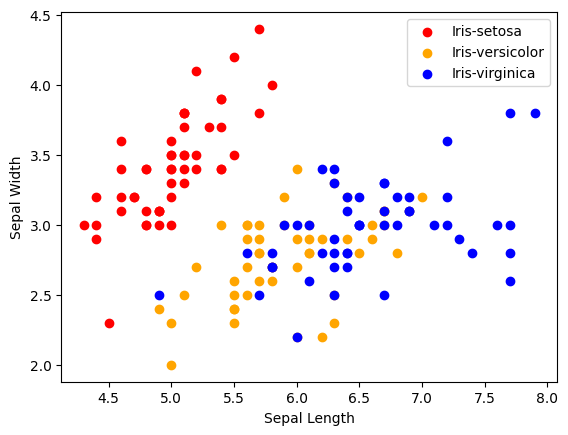

In [14]:
for i in range(3):
  x = df[df['species']== species[i]]
  plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Sepal Width")
  plt.legend()

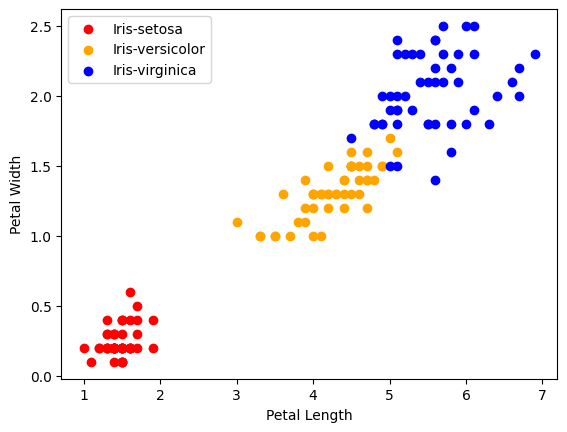

In [15]:
for i in range(3):
  x = df[df['species']== species[i]]
  plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
  plt.xlabel("Petal Length")
  plt.ylabel("Petal Width")
  plt.legend()

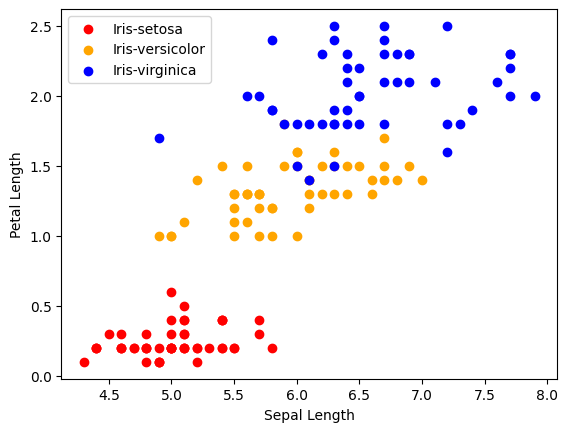

In [16]:
for i in range(3):
  x = df[df['species']== species[i]]
  plt.scatter(x['sepal_length'], x['petal_width'], c = colors[i], label=species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Petal Length")
  plt.legend()

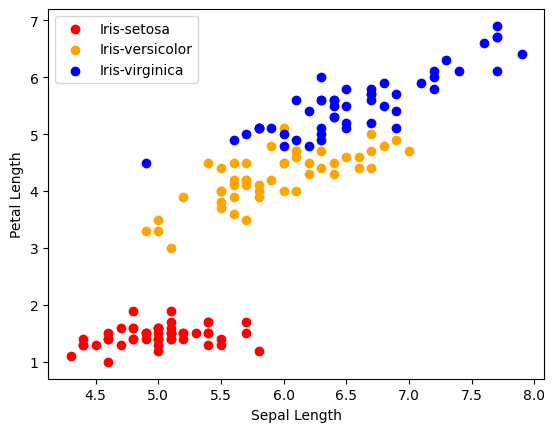

In [17]:
for i in range(3):
  x = df[df['species']== species[i]]
  plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Petal Length")
  plt.legend()

Correlation Matrix

In [18]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [19]:
correlation_matrix = numeric_df.corr()

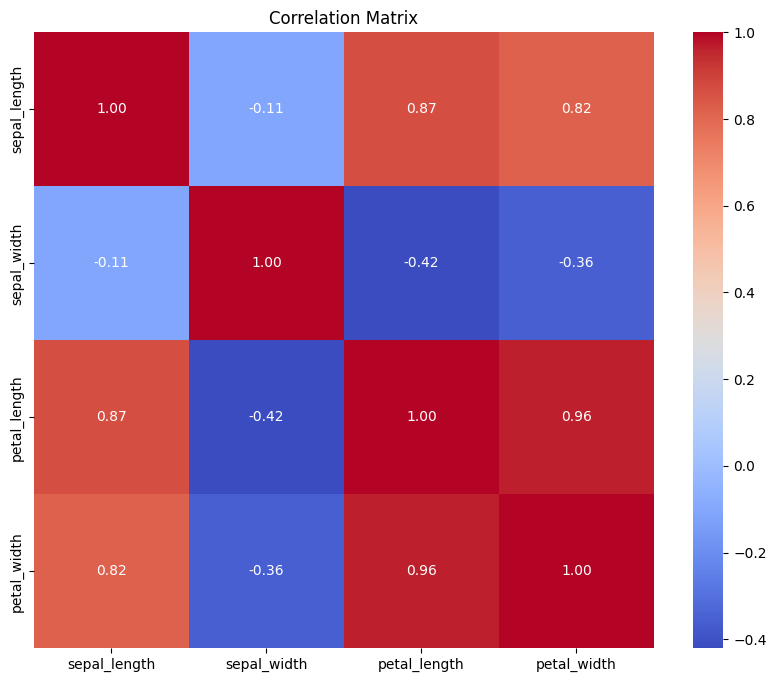

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


Model Traing


In [24]:
# train - 70
# test - 30
x = df.drop(columns=['species'])
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

In [25]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
model.fit(x_train, y_train)

LogisticRegression()

In [27]:
# print meric to get performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [28]:
# knn - k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [29]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [30]:
# print metric to get performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [31]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [32]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [76]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
139,6.9,3.1,5.4,2.1
60,5.0,2.0,3.5,1.0
17,5.1,3.5,1.4,0.3
144,6.7,3.3,5.7,2.5
108,6.7,2.5,5.8,1.8


In [33]:
# print metric to get performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [51]:
from sklearn.tree import DecisionTreeClassifier
import pickle

In [54]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [71]:
# save the model
filename = 'finalized model.sav'
try:
  with open(filename, 'wb') as file:
    pickle.dump(model, file)
    print("Model saved successfully.")
except Exception as e:
      print(f"Error saving the model: {e}")

Model saved successfully.


In [72]:
load_model = pickle.load(open(filename, 'rb'))

In [73]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

array([1])

In [60]:
from sklearn.linear_model import LogisticRegression

In [68]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
139,6.9,3.1,5.4,2.1
60,5.0,2.0,3.5,1.0
17,5.1,3.5,1.4,0.3
144,6.7,3.3,5.7,2.5
108,6.7,2.5,5.8,1.8


In [75]:
load_model.predict([[5,3,1,4]])

array([2])

In [81]:
import sklearn
print(sklearn.__version__)

1.2.2


In [82]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
139,6.9,3.1,5.4,2.1
60,5.0,2.0,3.5,1.0
17,5.1,3.5,1.4,0.3
144,6.7,3.3,5.7,2.5
108,6.7,2.5,5.8,1.8


In [84]:
load_model.predict([[4,3,1,5]])

array([2])